
<font color = darkyellow><b>Name:</b> </font> Vo Khanh Linh 
<br><font color = darkyellow><b>MSSV:</b> </font> 22C15012
<br><font color = darkyellow><b>Class:</b> </font> Math for AI
***
# <font color = green><center><u>Project</u>: LAB 1 </font> </center>

<center><b>Xây dựng chương trình biển diễn đồ thị (lớn và tổng quát) với một số chức năng cơ bản và xuất tập hợp các đồ thị con</center></b>

***

<b> 1. Set up environment and required package</b>
- Import `deque` from collections module to improve the time complexity of  Breadth-First Search (BFS) later from O(n^2) to O(V+E) where V is the number of vertices and E is the number of edges in the graph.
- Import `networkx` and `matplotlib` to visualize graph data.

In [55]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

<b>2. Class `Node`,  which represents a node in a graph </b>

- `__init__(self, value)`: This is the constructor method for the class. It takes a single argument value which is used to set the value of the node. It also initializes an empty list children which will be used to store the children of the node.

- `add_child(self, *args)`: This method takes one or more child nodes as arguments and adds them to the list of children of the node.

- `__len__(self)`: This method is used to define the behavior of the len() function when applied to an object of this class. It returns the number of children of the node.

- `__repr__(self)`: This method is used to define the string representation of the object of this class. It returns a string that includes the value of the node.

In [56]:
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []
    def add_child(self, *args):
        self.children.extend(args)
    def __len__(self):
        return len(self.children)
    def __repr__(self):
        return str(self.value)

<b>3. Breadth-First Search Algorithm</b>
- This code is implementing a `Breadth-First Search (BFS)` algorithm on a graph, starting from a given starting node.

- The algorithm uses a `queue` to keep track of the nodes to be visited next. The starting node is added to the queue.

- A set, `visited`, is used to keep track of the nodes that have been visited already, so that the algorithm does not revisit them.

- A set, `child_paths`, is used to keep track of the child nodes of the start node.

- The while loop continues as long as there are nodes in the queue. The algorithm takes the next node from the left of the queue (using `popleft()`) and checks if it has been visited already. If it has, the loop continues to the next iteration. If it has not been visited, the algorithm marks the node as visited by adding it to the set of visited nodes and adding its child nodes to the queue to be visited next.

- Finally, it returns the set of child paths visited by the algorithm.

- Using the `deque` class from the `collections` module can optimize the code as it is implemented as a doubly-ended queue, which provides O(1) time complexity for both append and pop operations from either end of the queue. This means that the time complexity of BFS using a deque is O(V+E) where V is the number of vertices and E is the number of edges in the graph.


In [4]:
def BFS(start_node):
    queue = deque()
    queue.append(start_node)
    visited = set()
    child_paths = set()
    while queue:
        node = queue.popleft()
        if node in visited:
            continue
        visited.add(node)
        child_paths.add(node)
        for child in node.children:
            queue.append(child)
    return child_paths

### <font color = lightblue> Model 1: Directed Graph </font>
- <b><font color = red> Input:</font></b> Node = [0,1,2,3,4,5] 

- <b><font color = red> Output:</font></b> Edge = [(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (3, 5), (4, 0), (5, 2), (5, 4)]

- <b><font color = red>Application:</font></b> Finding Path Program

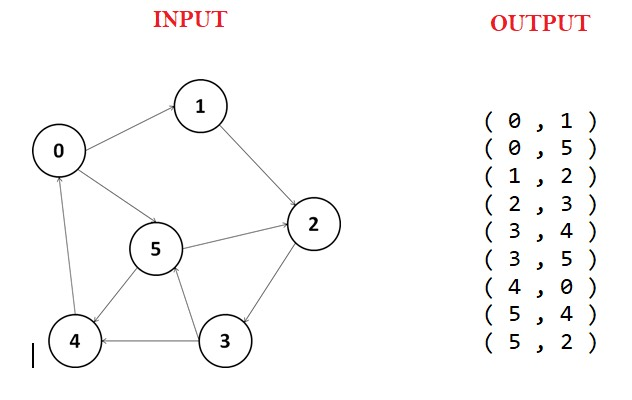

<b>Create a tree with nodes and edges<b>

In [57]:
#Create nodes
Zero = Node("0")
One = Node("1")
Two = Node("2")
Three = Node("3")
Four = Node("4")
Five = Node("5")

#Add edges between the nodes
Zero.add_child(One, Five)
One.add_child(Two)
Two.add_child(Three)
Three.add_child(Four, Five)
Four.add_child(Zero)
Five.add_child(Four, Two)

<b>Create and visualize a directed graph</b>

<i>The code generates a directed graph with edges from the BFS traversal and display it, the edges are the connections between the nodes in the graph.</i>

- First, it creates an empty directed graph G1 using the `nx.DiGraph()` function.

- Then, it iterates over each node in the result of the BFS function starting from a node named Zero and for each node, it iterates over its children. For each pair of node and child, it adds an edge between them using `G1.add_edge(node, child)` method, this will connect the node with its children in the graph.

- After the edges are added, it uses the `nx.circular_layout(G1)` function to set the position of the nodes in a circular layout, then it uses the `nx.draw()` method to customize the graph visualization.
    - `node_size` is used to define the size of the node.
    - `node_color` is used to define the color of the node.
    - `edge_color` is used to define the color of the edges.
    - `font_color` is used to define the color of the font.
    - `width` is used to define the width of the edges, and `with_labels` is used to show/hide the labels of the nodes.

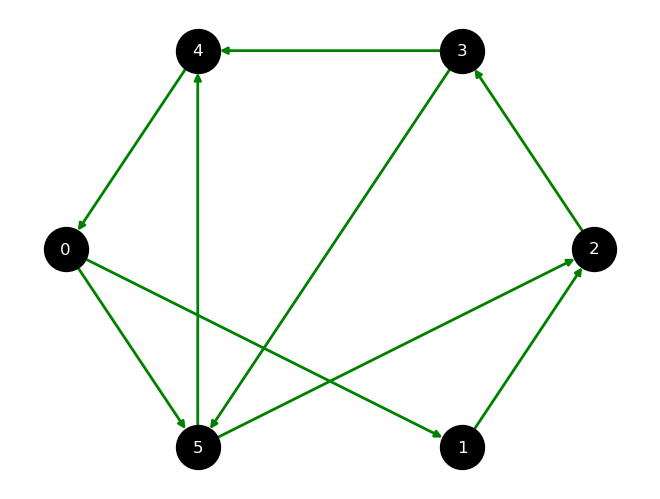

In [58]:
G1 = nx.DiGraph()
#Add edges for each path
for node in BFS(Zero):
    for child in node.children:
        G1.add_edge(node, child)
#Customize the graph visualization
pos = nx.circular_layout(G1)
nx.draw(G1, pos, node_size=1000, node_color='black',font_color = 'white', edge_color='green', width=2, with_labels=True)
# Display the graph
plt.show()

<b>Print the output<b>

In [59]:
print("Output child nodes:", G1.edges())

Output child nodes: [(2, 3), (3, 4), (3, 5), (4, 0), (0, 1), (0, 5), (5, 4), (5, 2), (1, 2)]


<b><font color = orange>Application: Finding Path Program</font></b>

<b><u>Concept:</b></u>

- This is a program that allows user to find all the child paths started from specific node that they want based on the directed graph and BFS algorithm.

- This is an idea for suggesting maps/location of road.

- <i><u>For instance</i></u>: If you know where you start and not sure the destination, it could print all the connected paths. If you know where you start and also your destination, it could print the shortest path for you.

- The menu has 6 options:
    - Option 1: Visualize all the nodes
    - Option 2: Add a new node
    - Option 3: Remove a node
    - Option 4: Find all the possible child paths from a start node
    - Option 5: Find the shortedt path from a start node to a destination node
    - Option 6: Exit the program with or without saving the data



<u><b>Code:</u></b>

In [ ]:
import networkx as nx #to deploy the graph
import matplotlib.pyplot as plt #to visualize the graph
import random #to generate random data
import pickle #to save the random data
from collections import deque # to optimize the time when using BFS
import os #to save data in local file

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)
        
    def __len__(self):
        return len(self.children)
    
    def __repr__(self):
        return str(self.value)
        
def find_child_path(start_node):
    queue = deque()
    queue.append([start_node])
    child_paths = set()
    visited = set()
    while queue:
        path = queue.popleft()
        node = path[-1]
        child_paths.add(tuple(path))
        if node in visited:
            continue
        visited.add(node)
        for child in node.children:
            new_path = list(path)
            new_path.append(child)
            queue.append(new_path)
    return list(child_paths)

def find_child_path_user_input(nodes):
    start_value = int(input("Please enter the value of the start node: "))
    start_node = None
    for node in nodes:
        if node.value == start_value:
            start_node = node
            break
    if start_node:
        child_paths = find_child_path(start_node)
        if child_paths:
            print("Unique Child paths of node", start_node.value, ":", child_paths)
        else:
            print("Node", start_node.value, "not found in the tree")
        G = nx.DiGraph()
        for path in child_paths:
            for i in range(1, len(path)):
                G.add_edge(path[i-1], path[i])
        plt.clf()
        nx.draw(G, with_labels=True)
        plt.show()
    else:
        print("Node with value", start_value, "not found in the tree.")

'''
Check if the file exist or not, 
if the file exist, program will load the data from the file,
if not the program will create a new one.
'''
if os.path.isfile("nodes.pickle"):
    with open("nodes.pickle", "rb") as f:
        nodes = pickle.load(f)
else:
    # Create a tree with random 100 nodes and 1000 edges
    root = Node(0)
    nodes = [root]
    for i in range(1, 100):
        node = Node(i)
        parent_node = nodes[random.randint(0, i-1)]
        parent_node.add_child(node)
        nodes.append(node)

    for i in range(1000):
        parent_node = nodes[random.randint(0, 99)]
        child_node = nodes[random.randint(0, 99)]
        parent_node.add_child(child_node)

'''
Program using while loop
'''
while True:
    choice = input("Please choose an option: \n------------------------------ \n 1: Visualize All Nodes \n 2: Add Node \n 3: Remove Node \n 4: Find All The Child Paths \n 5: Find Shortest Path \n 6: Exit \n")
    if choice == "1":
        G = nx.DiGraph()
        for node in nodes:
            for child in node.children:
                G.add_edge(node, child)
        plt.clf()
        nx.draw(G, with_labels=True)
        plt.show()
    elif choice == "2":
        value = int(input("Please enter the value of the new node: "))
        parent_value = int(input("Please enter the value of the parent node: "))
        parent_node = None
        for node in nodes:
            if node.value == parent_value:
                parent_node = node
                break
        if parent_node:
            new_node = Node(value)
            parent_node.add_child(new_node)
            nodes.append(new_node)
            print("New node with value", value, "added as a child of node with value", parent_value)
        else:
            print("Parent node with value", parent_value, "not found in the tree.")
        with open('nodes.pickle', "wb") as f:
            pickle.dump(nodes, f)
    elif choice == "3":
        value = int(input("Please enter the value of the node to remove: "))
        for i, node in enumerate(nodes):
            if node.value == value:
            # remove the node from the nodes list
                nodes.pop(i)
            # remove the node from the graph
                G.remove_node(node)
                print("Node with value", value, "has been removed.")
                break
        else:
            print("Node with value", value, "not found in the tree.")
    elif choice == "4":
        find_child_path_user_input(nodes)
    elif choice == "5":
        '''
        This code first prompts the user for the values of the start and target nodes.
        Then it looks for the corresponding nodes in the nodes list.
        If both the start and target nodes are found,
        it performs BFS starting from the start node and stops when it reaches the target node.
        The shortest path from the start node to the target node is stored in the path list,
        which is then printed and visualized using NetworkX and matplotlib.
        '''
        start_value = int(input("Please enter the value of the start node: "))
        target_value = int(input("Please enter the value of the target node: "))
        start_node = None
        target_node = None
        for node in nodes:
            if node.value == start_value:
                start_node = node
            elif node.value == target_value:
                target_node = node
        if start_node and target_node:
            queue = deque()
            queue.append([start_node])
            visited = set()
            while queue:
                path = queue.popleft()
                node = path[-1]
                if node == target_node:
                    print("Shortest path from node", start_value, "to node", target_value, ":", path)
                    G = nx.DiGraph()
                    for i in range(1, len(path)):
                        G.add_edge(path[i-1], path[i])
                    nx.draw(G, with_labels=True)
                    plt.show()
                    break
                if node in visited:
                    continue
                visited.add(node)
                for child in node.children:
                    new_path = list(path)
                    new_path.append(child)
                    queue.append(new_path)
        else:
            if not start_node:
                print("Start node with value", start_value, "not found in the tree.")
            if not target_node:
                print("Target node with value", target_value, "not found in the tree.")
    elif choice == "6":
        save_data = input("Would you like to save the current data before exiting? (y/n) \n")
        if save_data == "y":
            with open("nodes.pickle", "wb") as f:
                pickle.dump(nodes, f)
            print("Data has been saved. Exiting program...")
        elif save_data == "n":
            #os.remove("nodes.pickle")
            print("Exiting program...")
        break

print("Program has been terminated.")

<b><u>Result:</u></b>

- Option 4: Find All Child Paths from a start node : <b>78</b>

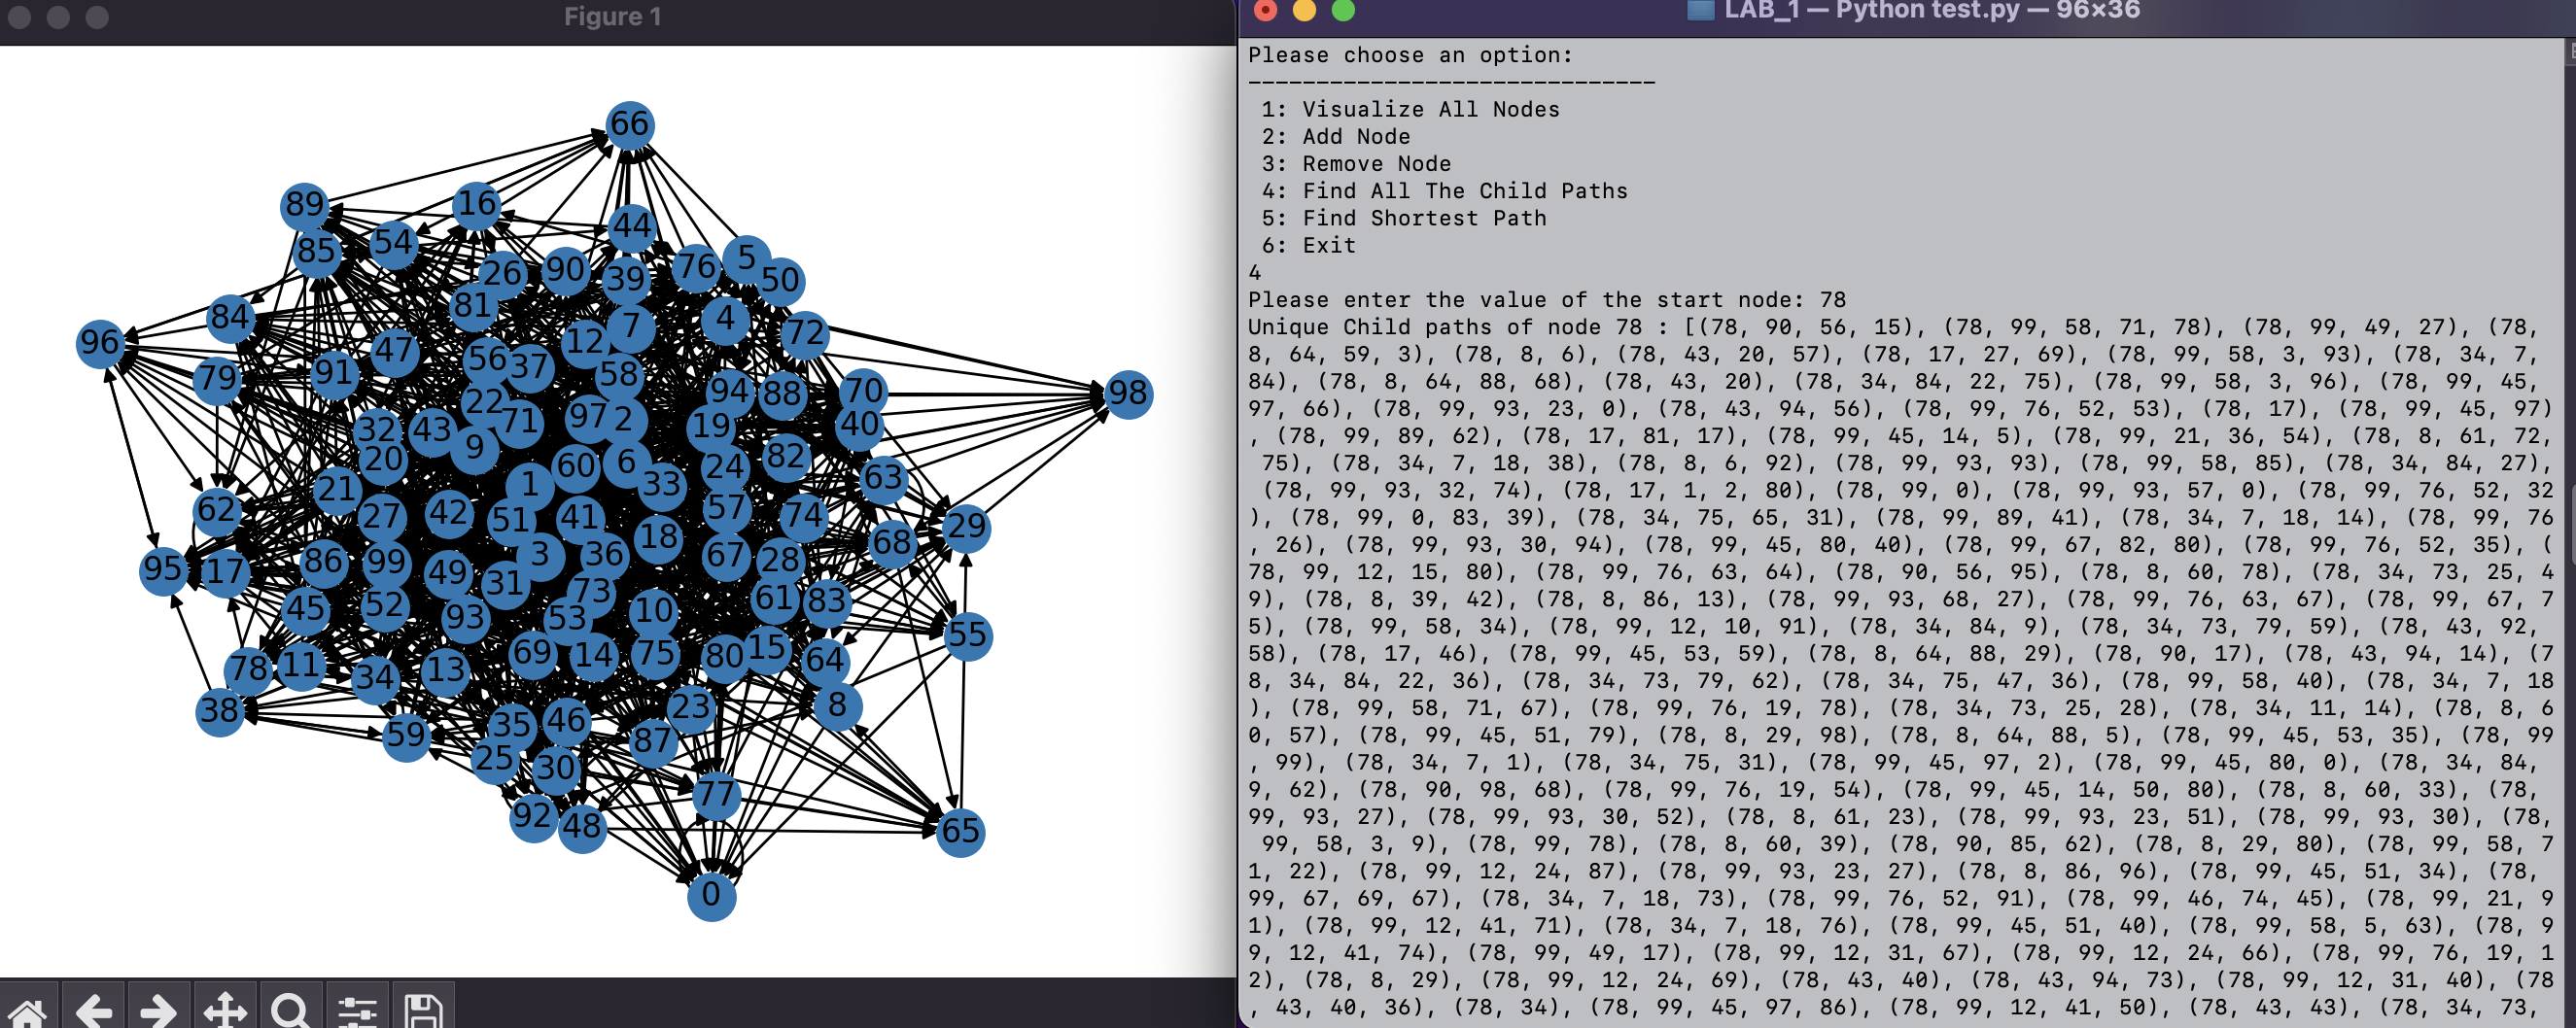

- Option 5: Find Shortest Path from a start node : <b>78</b> to destination node <b>84</b>

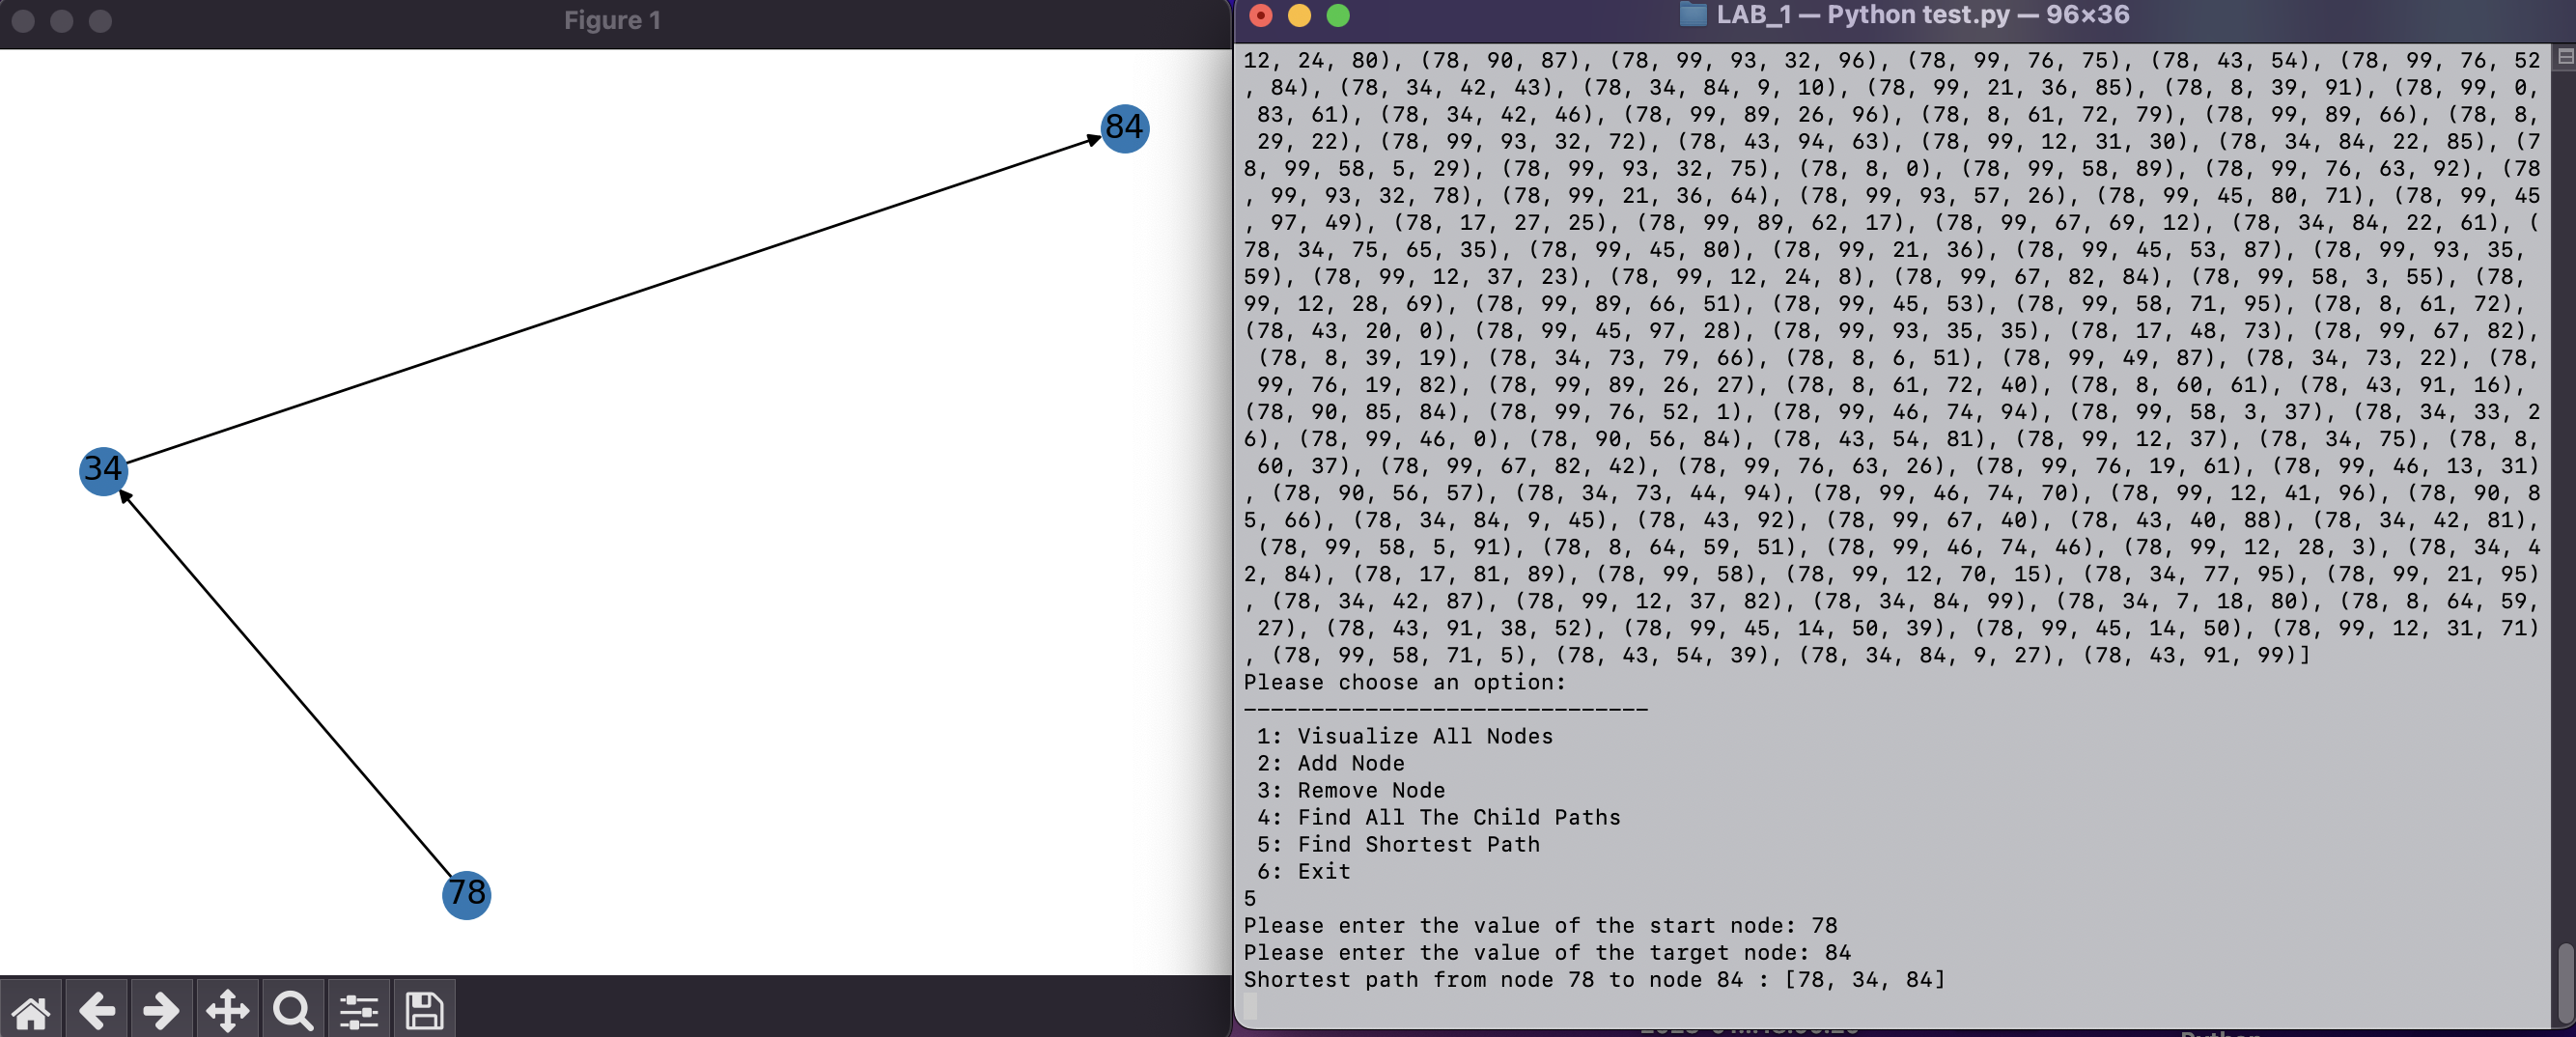

In the aboved program, I generated a random nodes and edges then stored it into the local file.

In additional, it could be stored in Neo4j using Cypher query. Below is a skeleton code and a demo picture of how to connect Neo4j, read data from pickle file and upload it into Neo4j, then extract data in reverse.

In [ ]:
#Don't execute
from py2neo import Graph
'''
In order to access a Neo4j database, it will need to use a driver library
that supports Neo4j's Cypher query language and the Bolt protocol.
'''
# Connect to the Neo4j database
graph = Graph(host='localhost:11003', auth=('neo4j', 'password'))
# Load the pickle file
with open('nodes.pickle', 'rb') as file:
    nodes = pickle.load(file)

#iterate over the data and create nodes or relationships in the Neo4j
for n in nodes:
    label = n['label']
    properties = n['properties']
    property_string = ','.join([f"{k}:{v}" for k, v in properties.items()])
    query = f"CREATE (n:{label} {{{property_string}}}) "
    graph.run(query)

# Execute the query
graph.run(query)


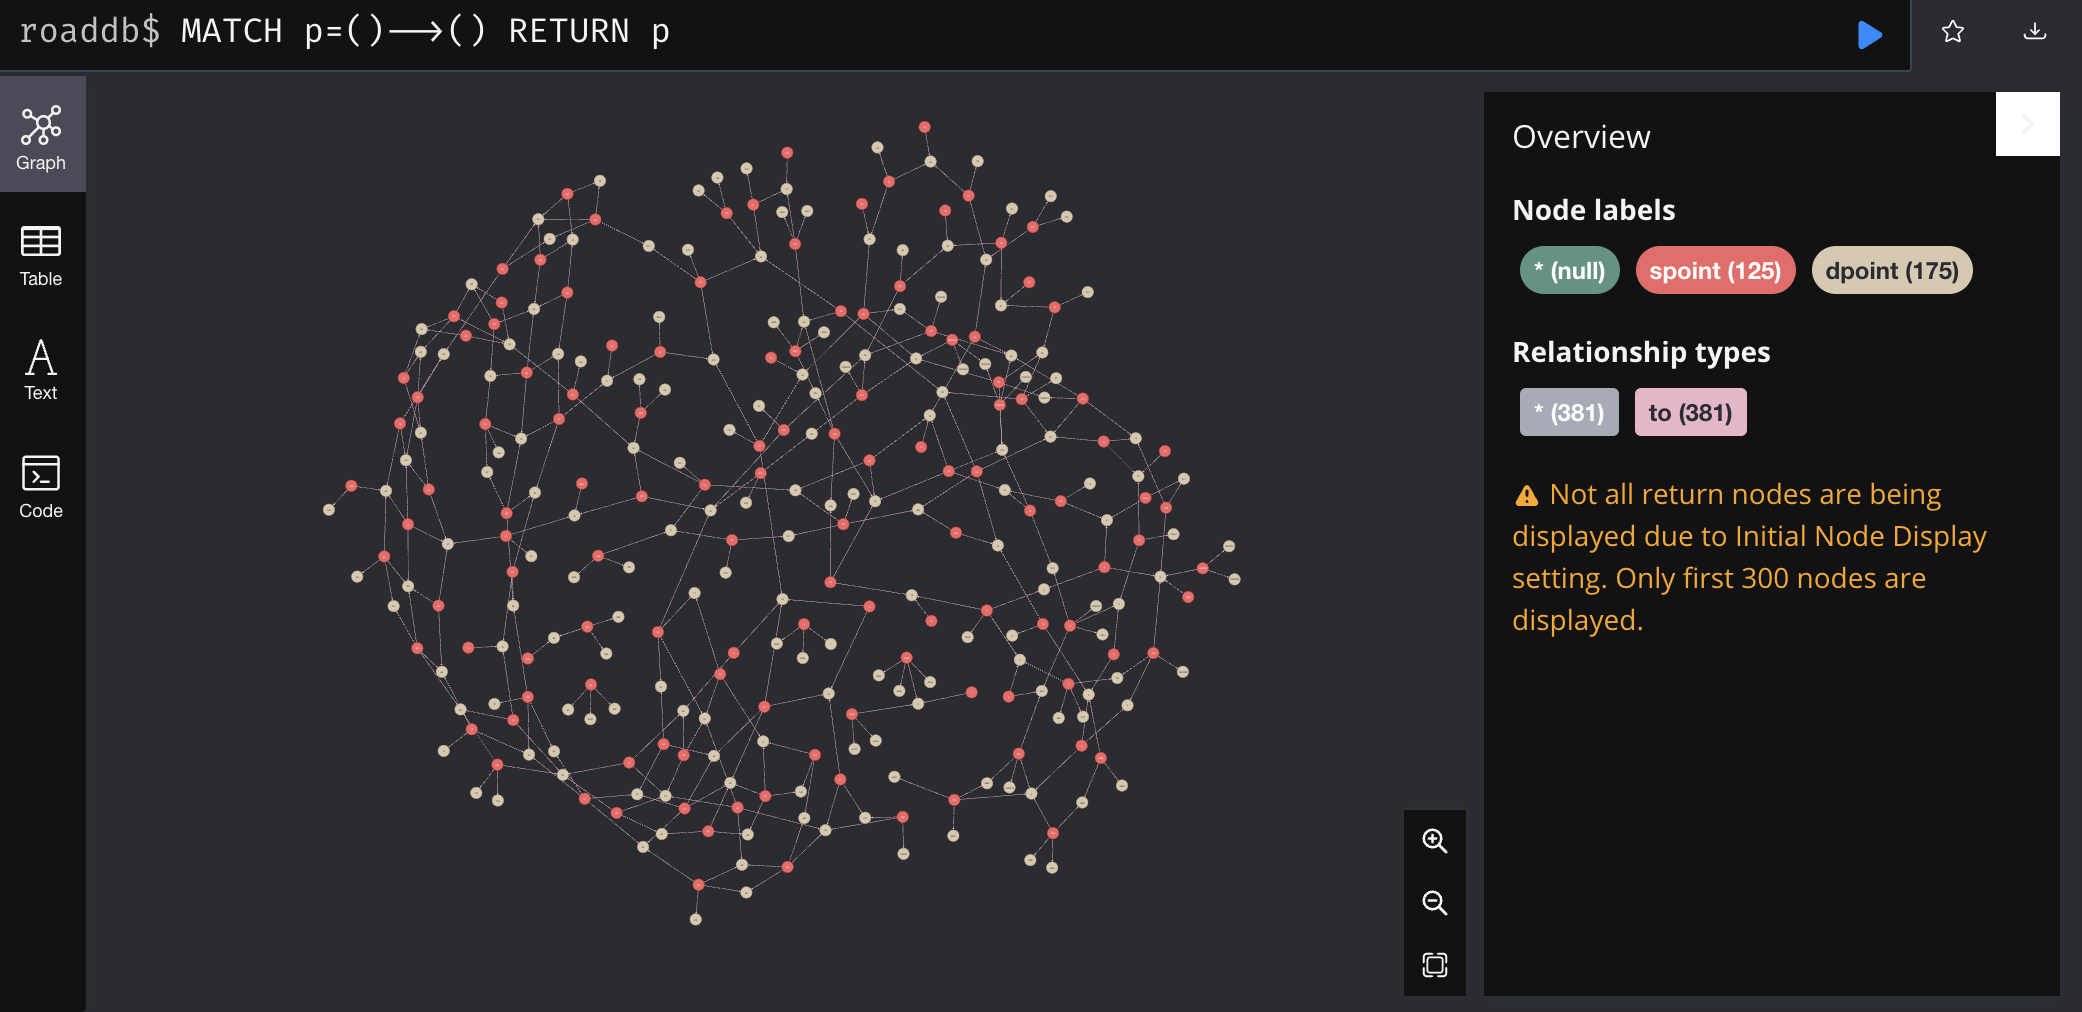

### <font color = lightblue> Model 2: Undirected graph </font>

- <b><font color = red>Input:</b></font> Bag of Words

- <b><font color = red>Output:</b></font> List all the Words in the graph in alphabetical order

- <b><font color = red>Application:</b></font> Suggested Word Program



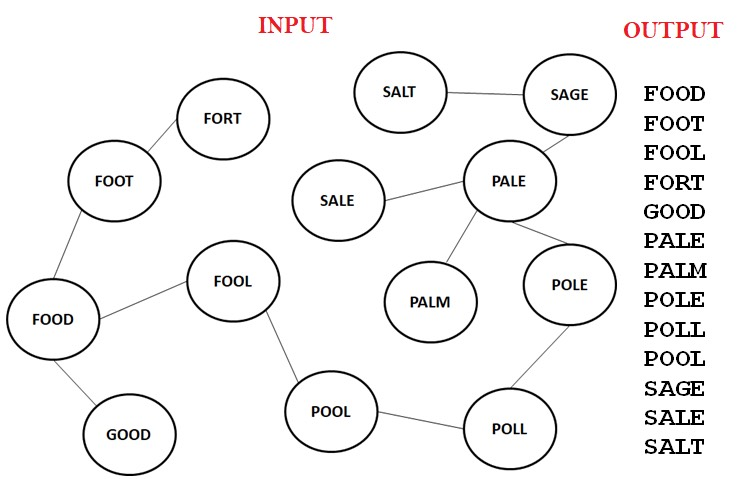

<b>Create a tree with nodes and edges</b>

In [68]:
#Create a tree with nodes and edges
Food = Node("Food")
Foot = Node("Foot")
Good = Node("Good")
Fool = Node("Fool")
Fort = Node("Fort")
Pool = Node("Pool")
Poll = Node("Poll")
Pole = Node("Pole")
Pale = Node("Pale")
Palm = Node("Palm")
Sale = Node("Sale")
Sage = Node("Sage")
Salt = Node("Salt")
Food.add_child(Foot, Fool, Good)
Foot.add_child(Fort)
Fool.add_child(Pool)
Pool.add_child(Poll)
Poll.add_child(Pole)
Pole.add_child(Pale)
Pale.add_child(Palm,Sale,Sage)
Sage.add_child(Salt)


<b>Create and visualize an undirected graph</b>

This step has some similar things with Model 1, but I will customize more on the 2 nodes that have more than one edge. 

- First, it creates an empty directed graph G2 using the `nx.Graph()` function and creates a dictionary `node_attributes` that maps the nodes `Food` and `Pale` to the size 2000 and color red and green respectively. 

- Then, it uses the `nx.spring_layout(G2)` function to set the position of the nodes in a spring layout.

- The nodelist argument of the `nx.draw_networkx_nodes()` function is set to the keys of the `node_attributes` dictionary, and the `node_color` and node_size arguments is set to the values of the `node_attributes` dictionary.


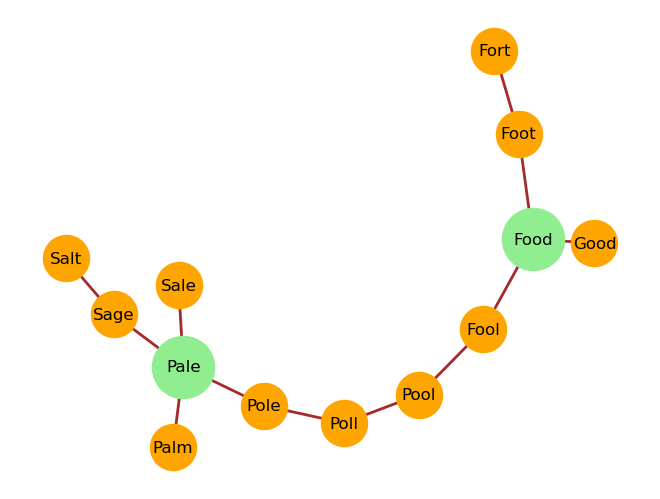

In [69]:
G2 = nx.Graph()

#Add edges for each path
for node in BFS(Food):
    for child in node.children:
        G2.add_edge(node, child)

#Create a dictionary of node colors and sizes
node_attributes = {Food: (2000, 'lightgreen'), Pale: (2000, 'lightgreen')}

#Customize the graph visualization
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_size=1100, node_color='orange',
font_color = 'black', edge_color='brown', width=2, with_labels=True)

#Draw the nodes with different colors and sizes
for node, (size, color) in node_attributes.items():
    nx.draw_networkx_nodes(G2, pos, nodelist=[node], node_size=size, node_color=color)
plt.show()

<b>Print the output in alphabetical order</b>

- I convert the set of paths to a list and then use the `sort()` method to sort the list by the node value using the key parameter. Then iterate over the sorted list and print the path.

In [80]:
bag_of_words = list(BFS(Food))
bag_of_words.sort(key = lambda x: x.value)
for word in bag_of_words:
    print(word)

Food
Fool
Foot
Fort
Good
Pale
Palm
Pole
Poll
Pool
Sage
Sale
Salt


<font color = orange><b>Application: Suggested Word Program</b></font>

<b><u>Concept:</b></u>

- This program is designed for an idea that builds an auto-suggestion for users.

- Its rule is to change only one letter each time in any position of the word. I will feed the system with a bag of 4-letter words and the program will uses a Trie data structure to store the bag of words which allows for faster word lookups and then applies BFS algorithm to find the suggestions.

<b><u>Code:</u></b>

In [84]:
#Define the TrieNode
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_word = False
#Define the Trie
class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_word = True

    def search(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.is_word

#Define the suggestions function using BFS
def suggestions(word, trie, one_letter_away):
    suggestions = set()
    queue = deque()
    queue.append(word)
    visited = set()

    while queue:
        current_word = queue.popleft()
        if current_word in visited:
            continue
        visited.add(current_word)
        for i in range(len(current_word)):
            for j in 'abcdefghijklmnopqrstuvwxyz':
                new_word = current_word[:i] + j + current_word[i+1:]
                if new_word in one_letter_away:
                    if trie.search(new_word):
                        suggestions.add(new_word)
                        queue.append(new_word)

    return suggestions

#Creating Trie
trie = Trie()
bag_of_words = {'Food', 'Fool', 'Pool', 'Pale', 'Palm', 'Pole', 'Poll','Foot','Fort','Good','Sage','Sale','Salt'}
for word in bag_of_words:
    trie.insert(word)

#Pre-calculating set of words that are one letter away.
#This way, it doesn't need to generate new words by replacing letters.

one_letter_away = set()
for word in bag_of_words:
    for i in range(len(word)):
        for j in 'abcdefghijklmnopqrstuvwxyz':
            new_word = word[:i] + j + word[i+1:]
            one_letter_away.add(new_word)

#Getting the user input
user_input = input("Enter the word to look up: ")

#Finding suggestions
print("Your suggestion words for",user_input,"are: ",suggestions(user_input, trie, one_letter_away))


Your suggestion words for Palm are:  {'Palm', 'Pool', 'Pale', 'Pole', 'Poll'}
